In [2]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('../../plume_dynamic_analyzer/src/')

from analyzer.plume_utils import remove_all_0_plume

## 100 mTorr, 1.6 J/cm^2 for multiple growth

In [3]:
df_condition = pd.read_excel('../../data/Sample log.xlsx', sheet_name='SRO')
df_condition = df_condition.loc[[27, 34, 35, 37, 38, 39, 40], ['Growth', 'Pressure (mTorr)', 'Temperature (C)', 'Fluence (J/cm2)', 'Repetation rate (Hz)']]
df_condition.replace('700 (heater O)', 700, inplace=True)
df_condition.replace('650 (heater O)', 650, inplace=True)
df_condition.replace('700 (heater N)', 700, inplace=True)
df_condition['Growth'] = df_condition['Growth'].str.replace(r'LYW_YCG', 'YG', regex=True)
df_condition

Growth  Pressure (mTorr)  Temperature (C)  Fluence (J/cm2)  \
27  YG056             100.0              700              1.6   
34  YG063             100.0              700              1.6   
35  YG064             100.0              700              1.6   
37  YG066             100.0              700              1.6   
38  YG067             100.0              700              1.6   
39  YG068             100.0              700              1.6   
40  YG069             100.0              700              1.6   

    Repetation rate (Hz)  
27                   5.0  
34                   5.0  
35                   5.0  
37                   5.0  
38                   5.0  
39                   5.0  
40                   6.6

In [4]:
df_plume_all = []
for key in df_condition['Growth'].unique():
    file = glob.glob(f'../../data/Plumes/SRO_plume_metrics/{key}*metrics.csv')[0]
    print(file)
    df = pd.read_csv(file, index_col=0)
    df['Threshold'].astype(str)
    df = df[df['Threshold']=='200']
    df = remove_all_0_plume(df.reset_index(), metric='Area', viz=False)
    if key == 'YG065_pre':
        df['Growth'] = 'YG065_pre'
    df_plume_all.append(df)
df_plume_all = pd.concat(df_plume_all, ignore_index=True)
df_plume_all

# df_merged_hotcore = pd.merge(df_condition, df_plume_all, on='Growth')
# df_merged_hotcore

../../data/Plumes/SRO_plume_metrics\YG056_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG063_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG064_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG066_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG067_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG068_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG069_metrics.csv


plume_index  time_index  Distance     Velocity     Area Threshold  \
0                 0           0         0          0.0      0.0       200   
1                 0           1         0          0.0      0.0       200   
2                 0           2        72  144000000.0   2005.0       200   
3                 0           3       122  100000000.0   6529.0       200   
4                 0           4       148   52000000.0  11016.0       200   
...             ...         ...       ...          ...      ...       ...   
306299          287         123       210          0.0      0.0       200   
306300          287         124       210          0.0      0.0       200   
306301          287         125       210          0.0      0.0       200   
306302          287         126       210          0.0      0.0       200   
306303          287         127       210          0.0      0.0       200   

       Growth  
0       YG056  
1       YG056  
2       YG056  
3       YG056  
4       YG056  
...       ...  
306299  YG069  
306300  YG069  
306301  YG069  
306302  YG069  
306303  YG069  

[306304 rows x 7 columns]

### strict comparison: 065-066-067-068-069

In [5]:
hue_label = 'Growth'
df_sample = df_plume_all[df_plume_all['Growth'].isin(['YG065', 'YG066', 'YG067', 'YG068', 'YG069'])]

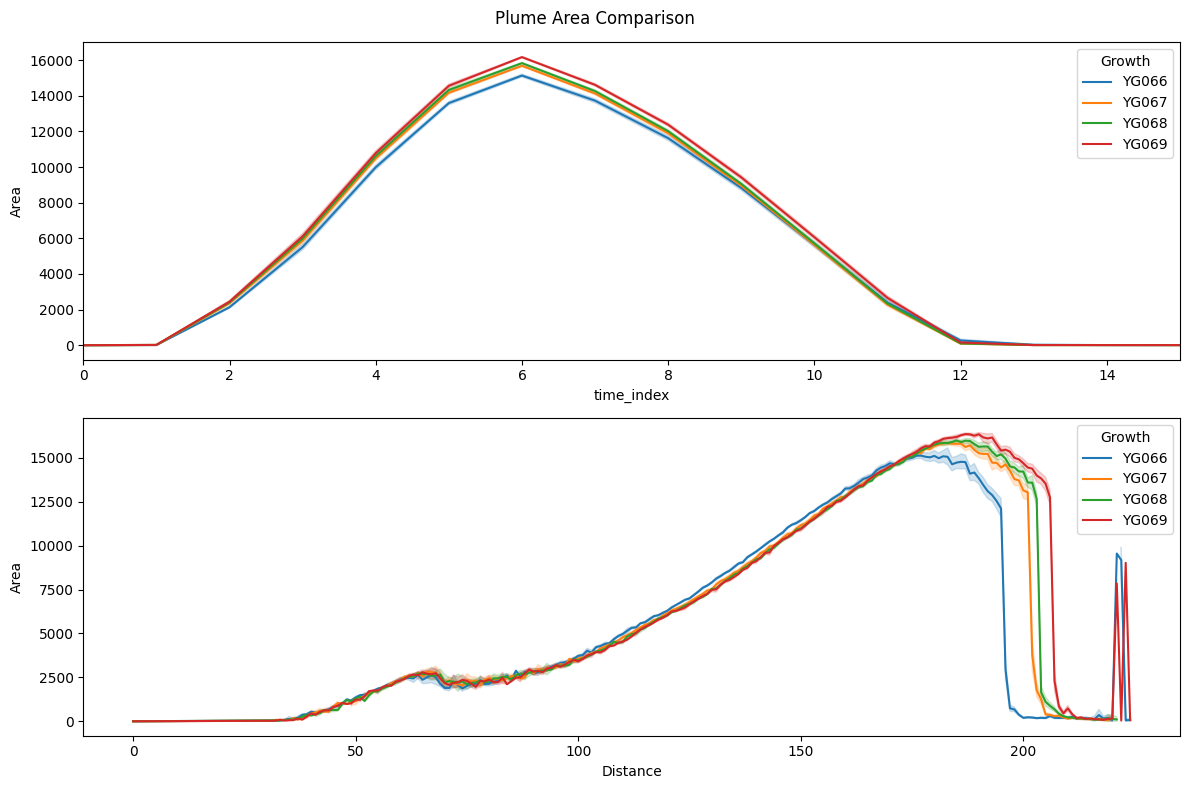

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
lineplot = sns.lineplot(x="time_index", y="Area", hue=hue_label, data=df_sample, ax=axes[0])
axes[0].set_xlim(0, 15)
lineplot = sns.lineplot(x="Distance", y="Area", hue=hue_label, data=df_sample, ax=axes[1])
plt.suptitle('Plume Area Comparison')
plt.tight_layout()
plt.show()

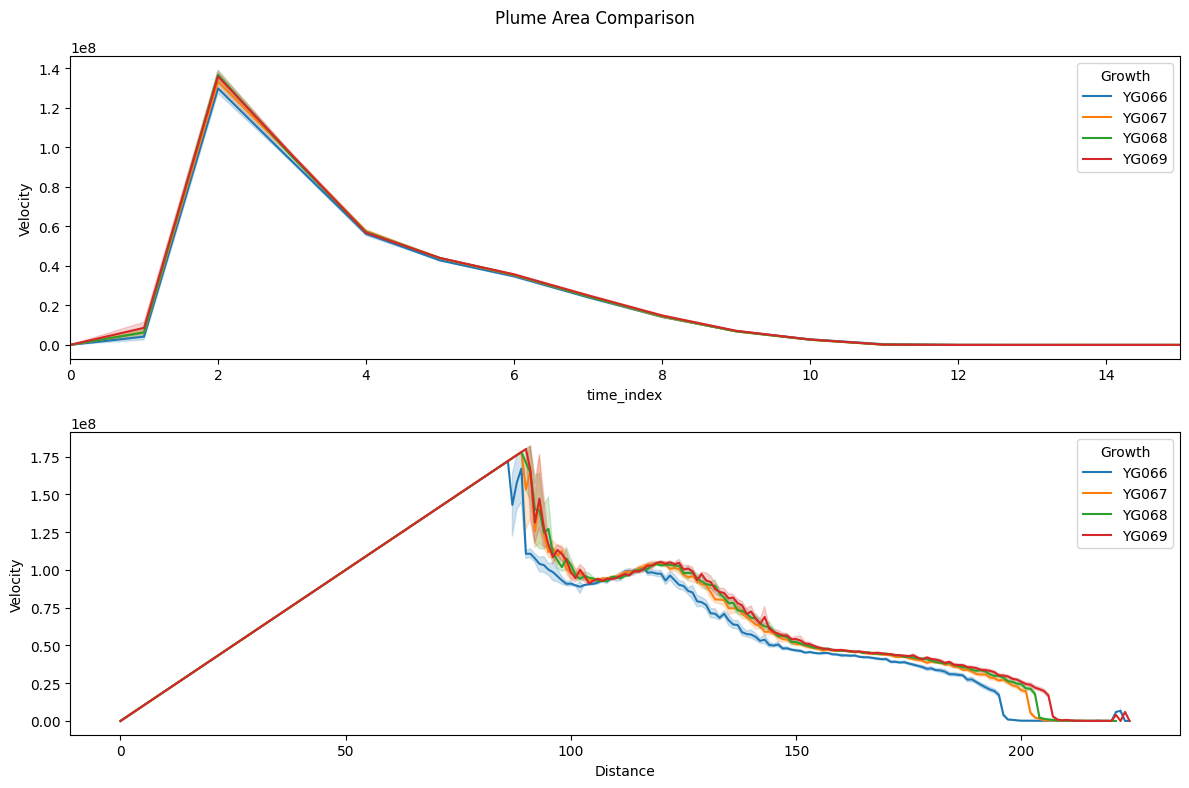

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lineplot = sns.lineplot(x="time_index", y="Velocity", hue=hue_label, data=df_sample, ax=axes[0])
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="Distance", y="Velocity", hue=hue_label, data=df_sample, ax=axes[1])
plt.suptitle('Plume Velocity Comparison')
plt.tight_layout()
plt.show()

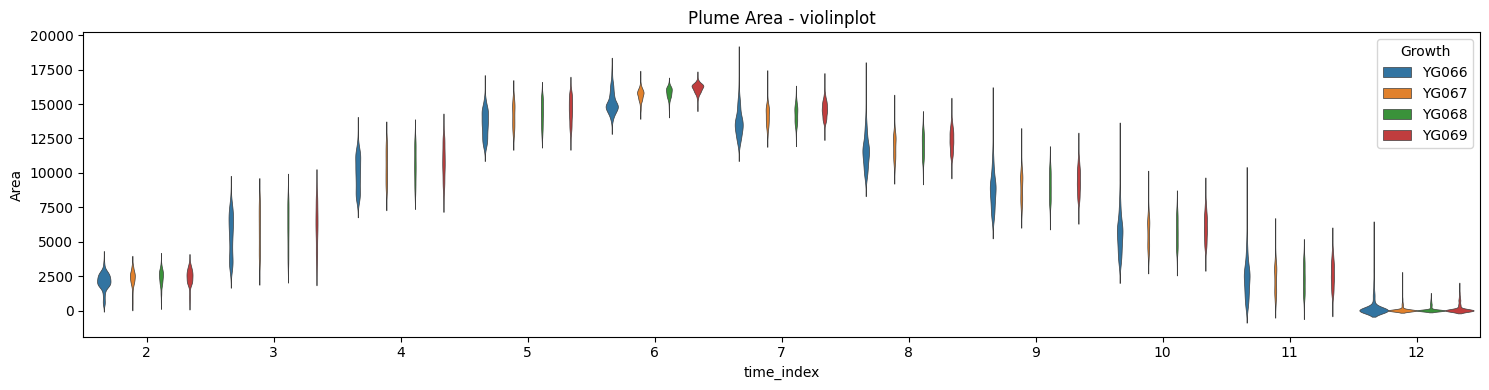

In [68]:
df_filtered = df_sample[df_sample['time_index'].isin(range(2, 13))]

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
sns.violinplot(x='time_index', y='Area', hue='Growth', data=df_filtered, inner=None, width=0.9, linewidth=0.5)
ax.set_title('Plume Area - violinplot')
plt.tight_layout()
plt.show()

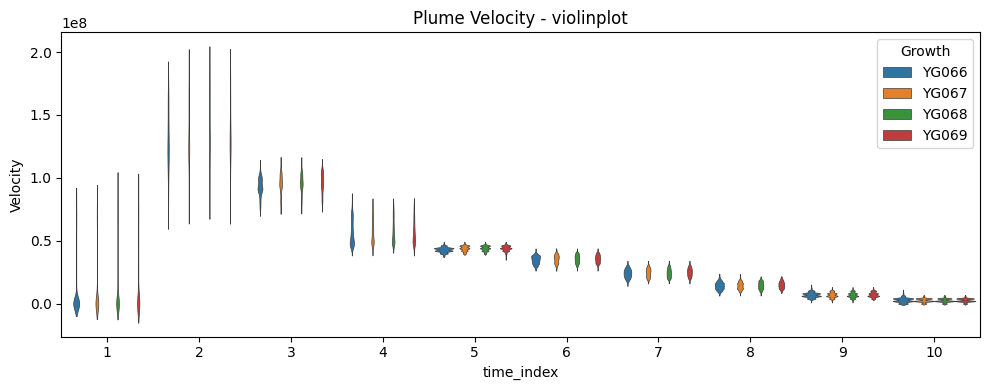

In [73]:
df_filtered = df_sample[df_sample['time_index'].isin(range(1, 11))]
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.violinplot(x='time_index', y='Velocity', hue='Growth', data=df_filtered, inner=None, width=0.9, linewidth=0.5)
ax.set_title('Plume Velocity - violinplot')
# ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

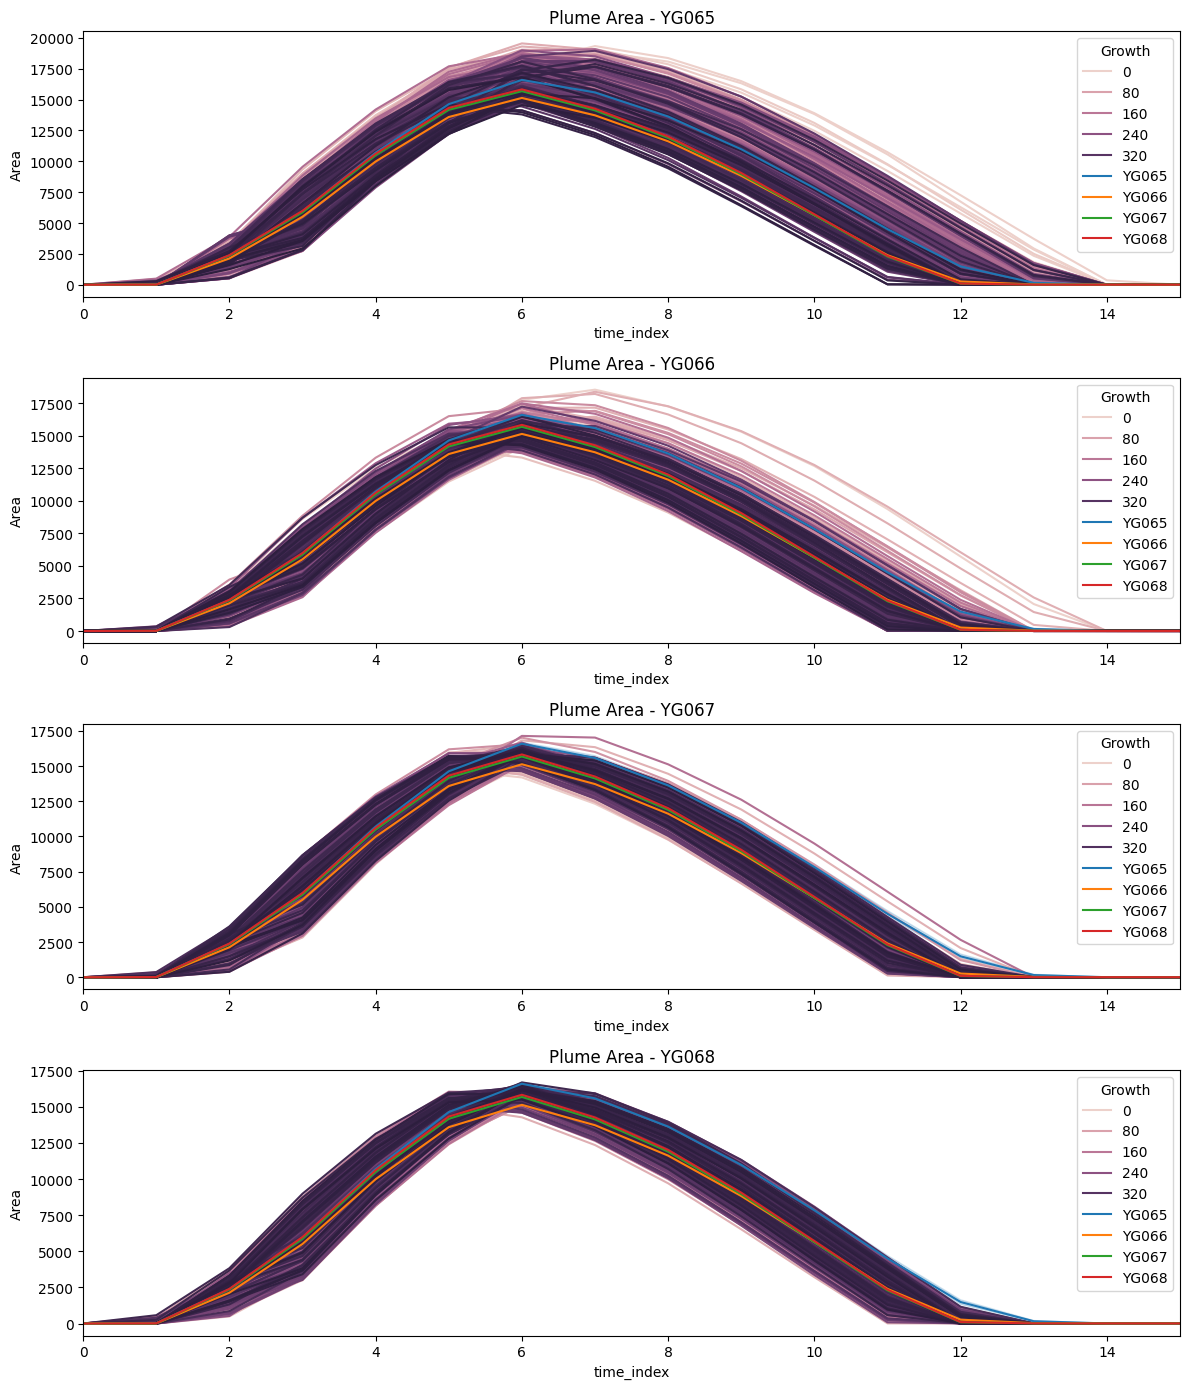

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(12, 14))

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_sample[df_sample['Growth']=='YG065'], ax=axes[0])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_sample, ax=axes[0])
axes[0].set_title('Plume Area - YG065')
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_sample[df_sample['Growth']=='YG066'], ax=axes[1])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_sample, ax=axes[1])
axes[1].set_title('Plume Area - YG066')
axes[1].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_sample[df_sample['Growth']=='YG067'], ax=axes[2])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_sample, ax=axes[2])
axes[2].set_title('Plume Area - YG067')
axes[2].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_sample[df_sample['Growth']=='YG068'], ax=axes[3])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_sample, ax=axes[3])
axes[3].set_title('Plume Area - YG068')
axes[3].set_xlim(0, 15)

plt.tight_layout()
plt.show()

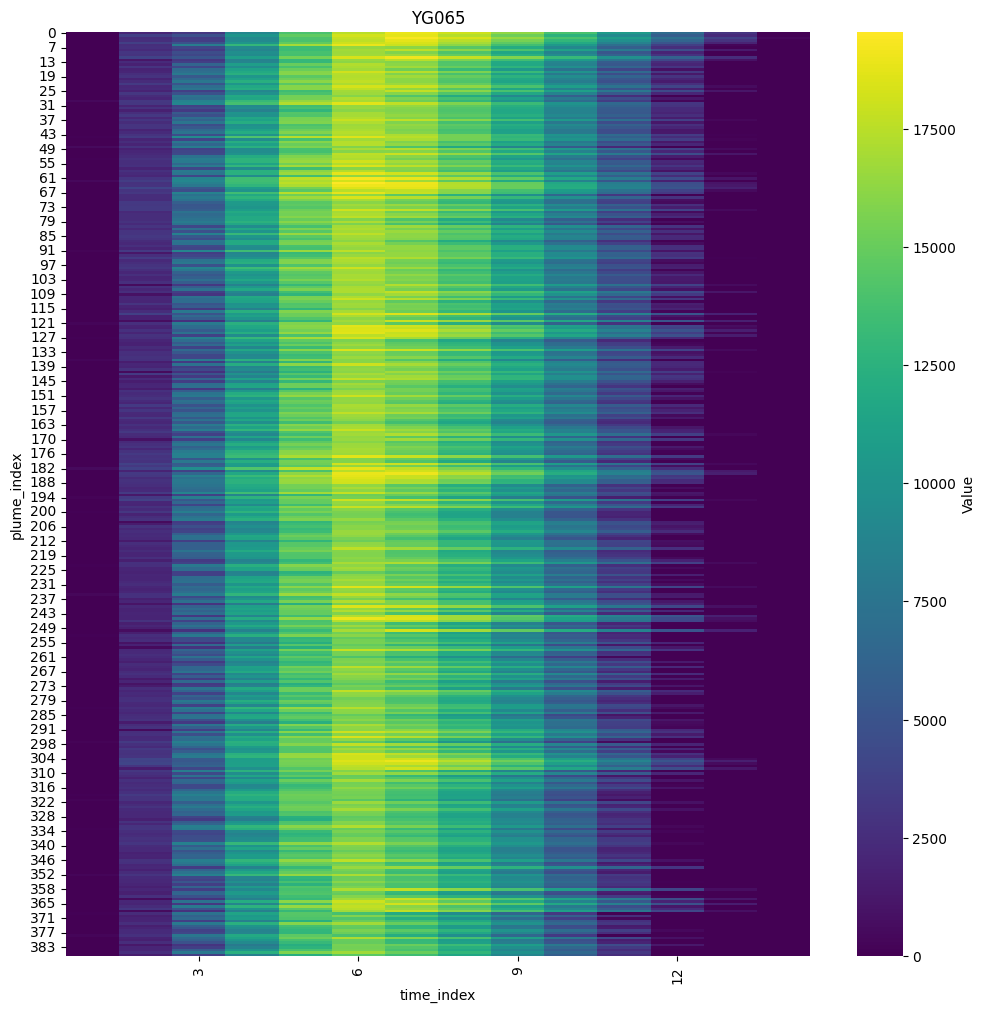

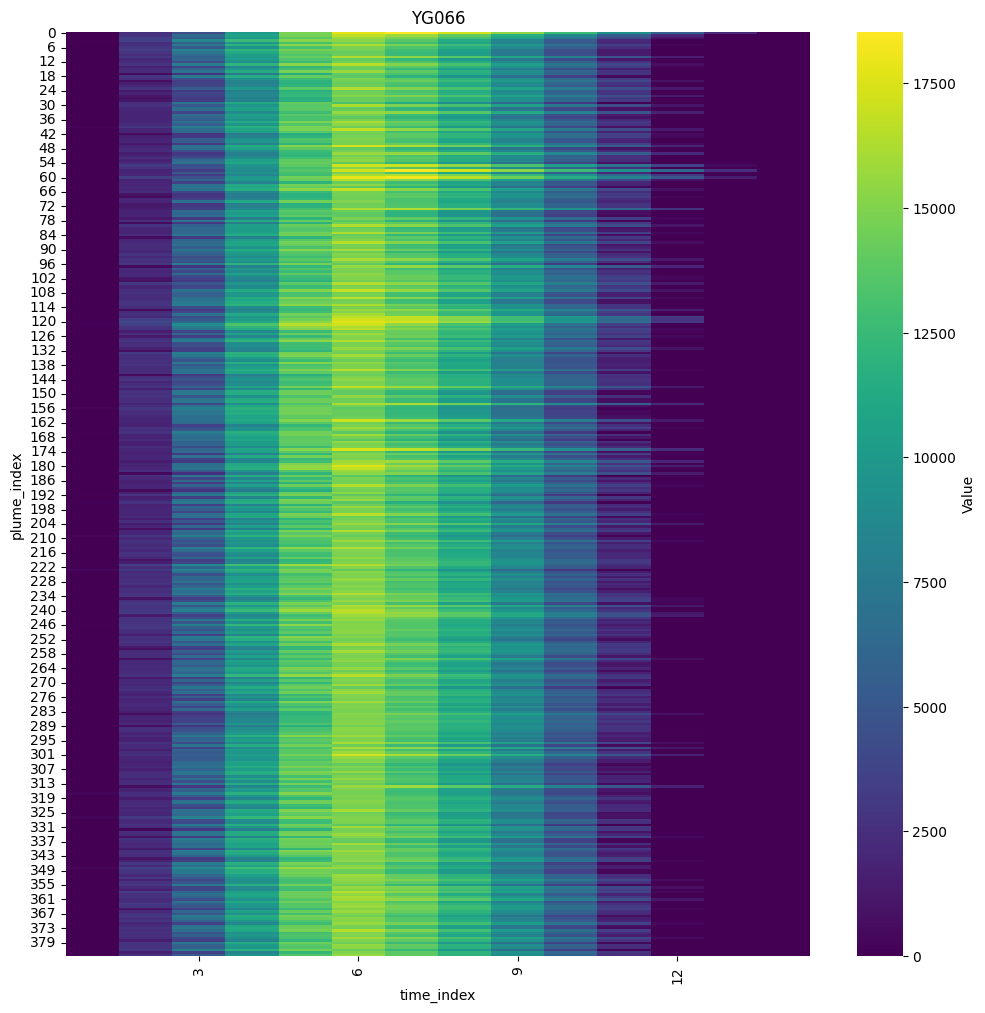

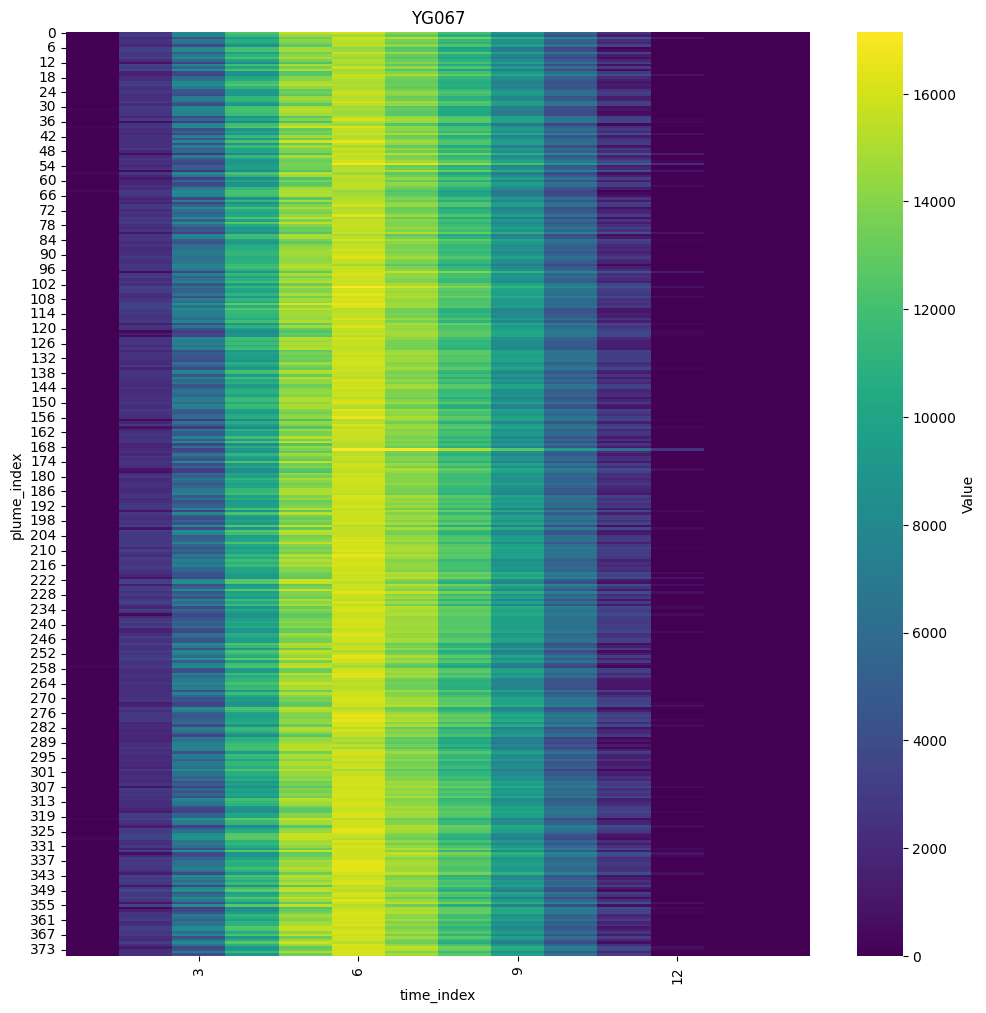

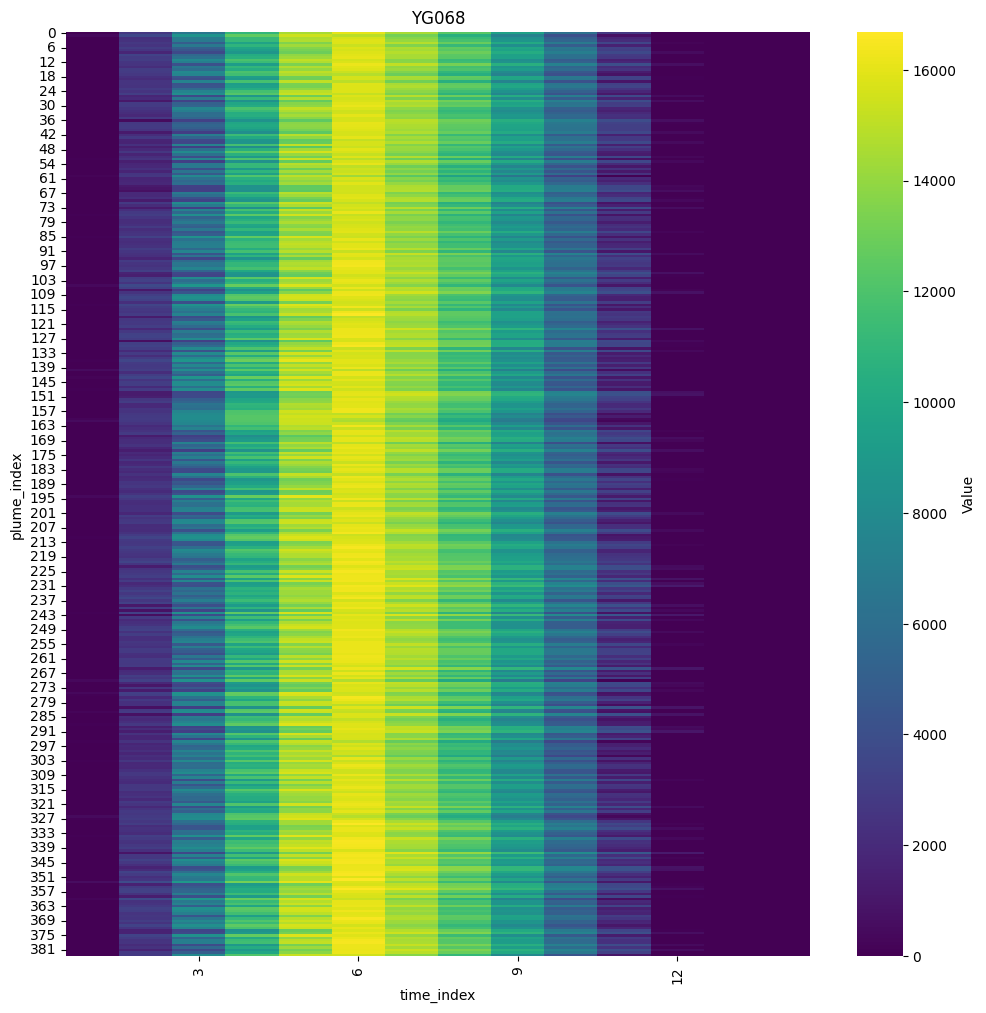

In [18]:
df_pivot = df_sample[df_sample['Growth']=='YG065'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.title("YG065")
plt.show()

df_pivot = df_sample[df_sample['Growth']=='YG066'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.title("YG066")
plt.show()

df_pivot = df_sample[df_sample['Growth']=='YG067'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.title("YG067")
plt.show()


df_pivot = df_sample[df_sample['Growth']=='YG068'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.title("YG068")
plt.show()

### viz metrics

In [16]:
hue_label = 'Growth'

#### seperated view

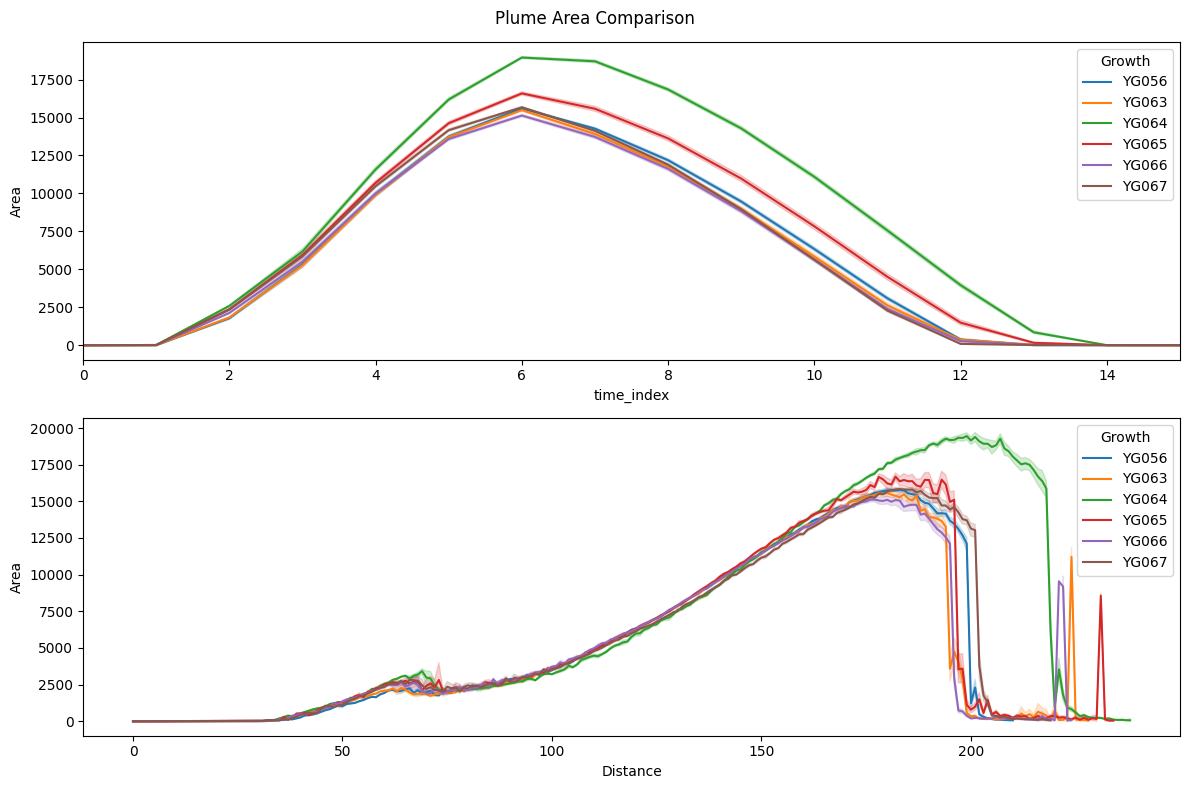

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lineplot = sns.lineplot(x="time_index", y="Area", hue=hue_label, data=df_plume_all, ax=axes[0])
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="Distance", y="Area", hue=hue_label, data=df_plume_all, ax=axes[1])
plt.suptitle('Plume Area Comparison')
plt.tight_layout()
plt.show()



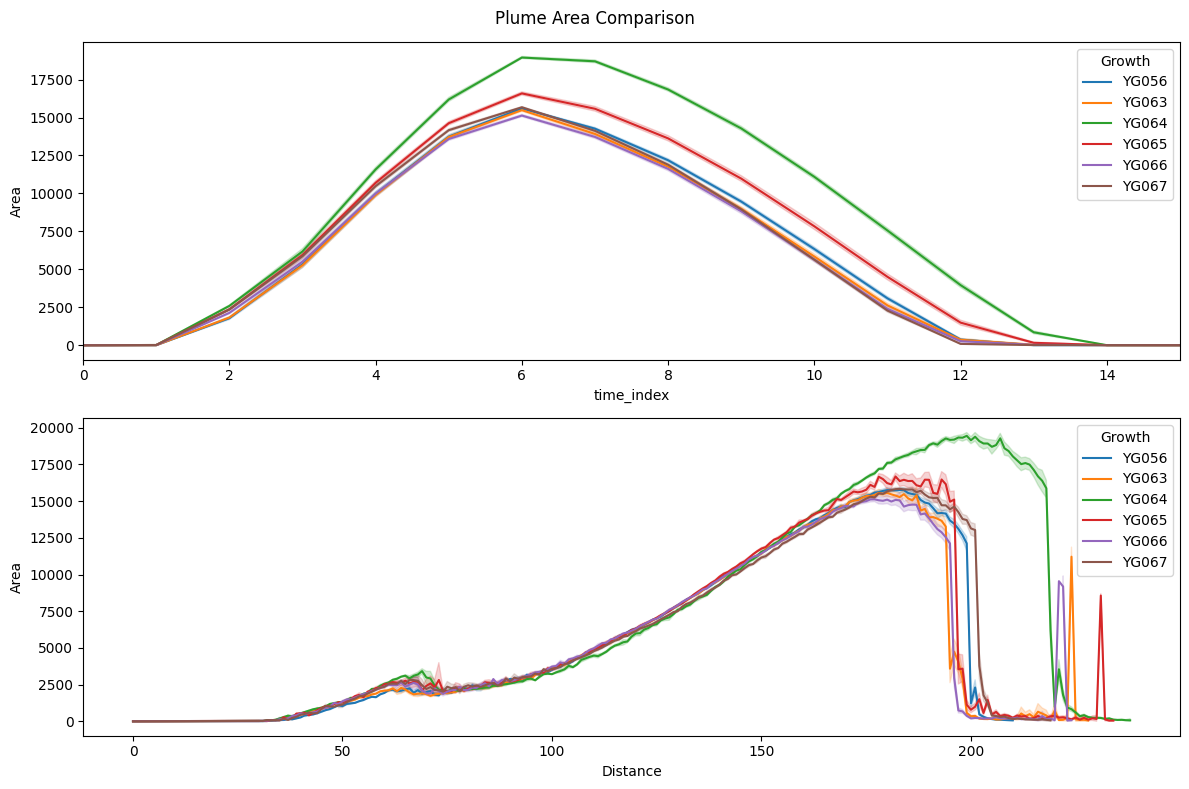

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lineplot = sns.lineplot(x="time_index", y="Area", hue=hue_label, data=df_plume_all, ax=axes[0])
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="Distance", y="Area", hue=hue_label, data=df_plume_all, ax=axes[1])
plt.suptitle('Plume Area Comparison')
plt.tight_layout()
plt.show()

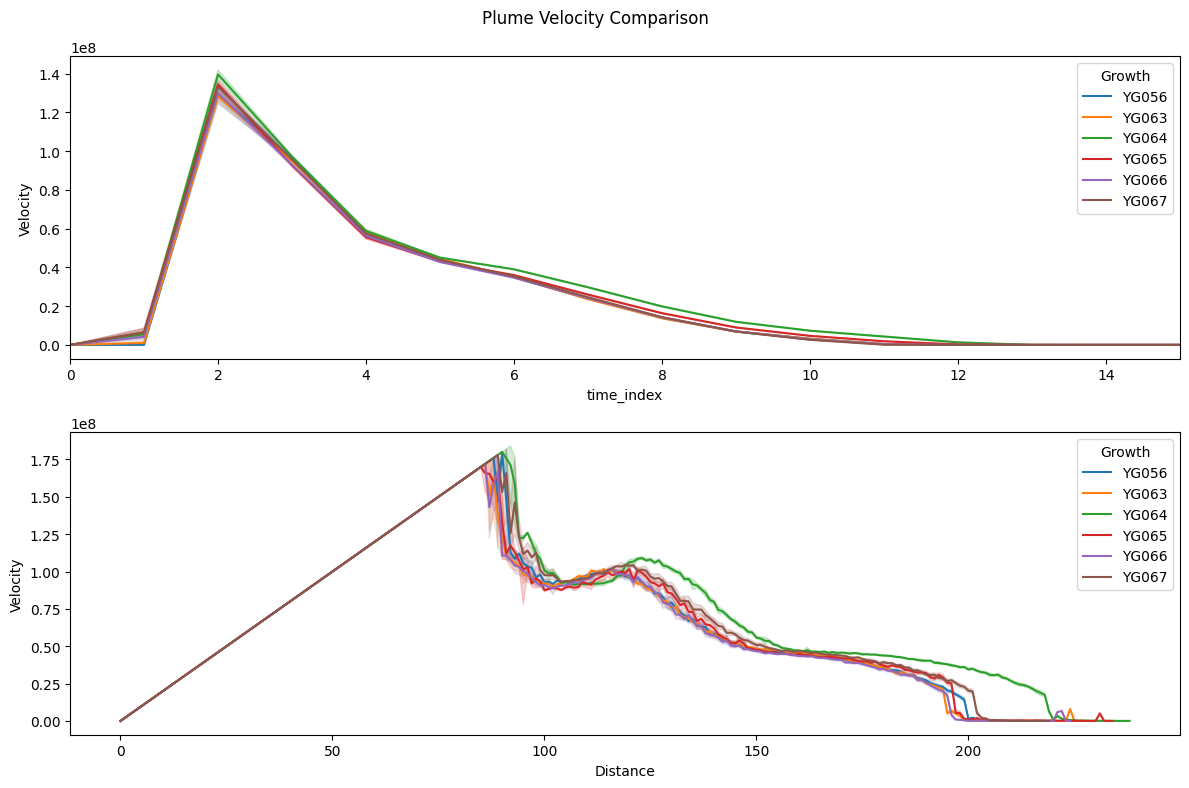

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lineplot = sns.lineplot(x="time_index", y="Velocity", hue=hue_label, data=df_plume_all, ax=axes[0])
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="Distance", y="Velocity", hue=hue_label, data=df_plume_all, ax=axes[1])
plt.suptitle('Plume Velocity Comparison')
plt.tight_layout()
plt.show()

#### compact view

In [24]:
hue_label = 'Growth'

palette_area = [(31, 119, 180), (44, 160, 44), (214, 39, 40)] 
palette_area = [(r/255, g/255, b/255) for r, g, b in palette_area]
palette_velocity = [(174, 199, 232), (152, 223, 138), (255, 152, 150)]
palette_velocity = [(r/255, g/255, b/255) for r, g, b in palette_velocity]

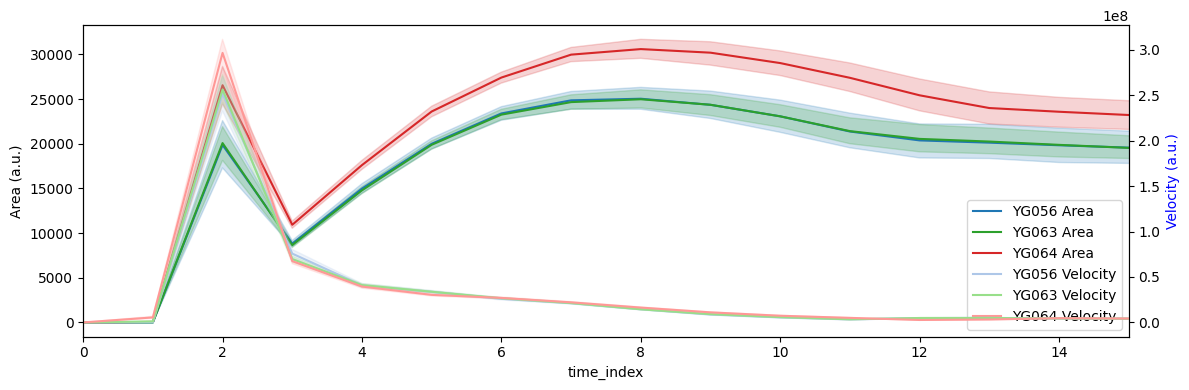

In [25]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))

sns.lineplot(x="time_index", y="Area", hue=hue_label, data=df_plume_all, ax=ax1, palette=palette_area, legend=False)
ax1.set_xlim(0, 15)
ax1.set_ylabel('Area (a.u.)', color='k')

ax2 = ax1.twinx()
sns.lineplot(x="time_index", y="Velocity", hue=hue_label, data=df_plume_all, ax=ax2, palette=palette_velocity, legend=False)
ax2.set_ylabel('Velocity (a.u.)', color='b')

lines_1, labels_1 = ax1.get_lines(), ['YG056 Area', 'YG063 Area', 'YG064 Area', ]
lines_2, labels_2 = ax2.get_lines(), ['YG056 Velocity', 'YG063 Velocity', 'YG064 Velocity']
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

# Tight layout and show plot
plt.tight_layout()
plt.show()

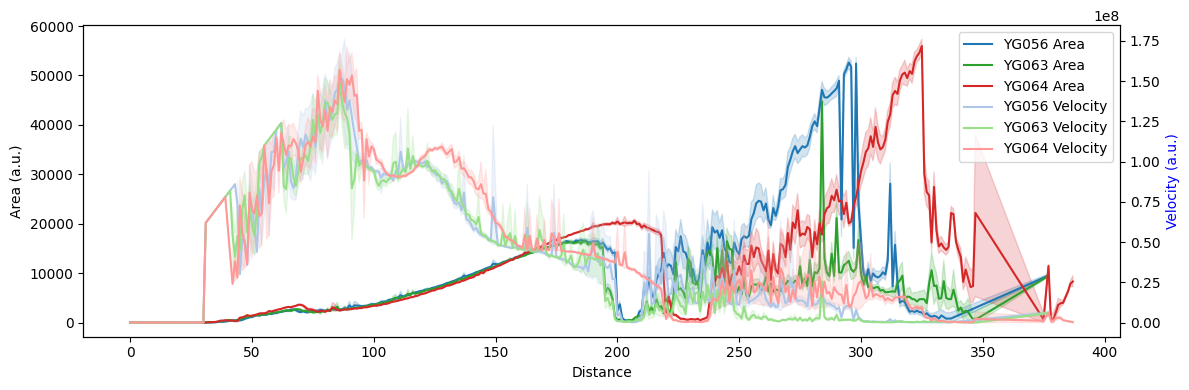

In [29]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))

sns.lineplot(x="Distance", y="Area", hue=hue_label, data=df_plume_all, ax=ax1, palette=palette_area, legend=False)
ax1.set_ylabel('Area (a.u.)', color='k')

ax2 = ax1.twinx()
sns.lineplot(x="Distance", y="Velocity", hue=hue_label, data=df_plume_all, ax=ax2, palette=palette_velocity, legend=False)
ax2.set_ylabel('Velocity (a.u.)', color='b')

lines_1, labels_1 = ax1.get_lines(), ['YG056 Area', 'YG063 Area', 'YG064 Area', ]
lines_2, labels_2 = ax2.get_lines(), ['YG056 Velocity', 'YG063 Velocity', 'YG064 Velocity']
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

# Tight layout and show plot
plt.tight_layout()
plt.show()

#### zoom in view

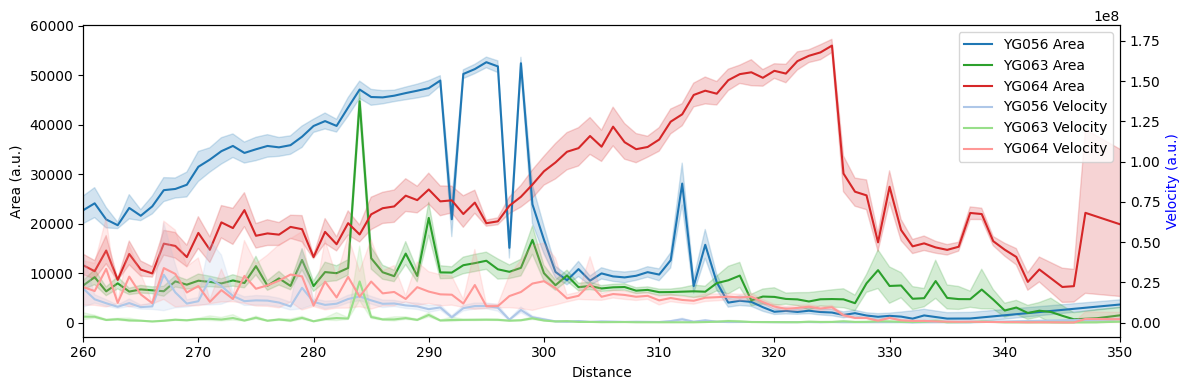

In [28]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))

sns.lineplot(x="Distance", y="Area", hue=hue_label, data=df_plume_all, ax=ax1, palette=palette_area, legend=False)
ax1.set_xlim(260, 350)
ax1.set_ylabel('Area (a.u.)', color='k')

ax2 = ax1.twinx()
sns.lineplot(x="Distance", y="Velocity", hue=hue_label, data=df_plume_all, ax=ax2, palette=palette_velocity, legend=False)
ax2.set_ylabel('Velocity (a.u.)', color='b')

lines_1, labels_1 = ax1.get_lines(), ['YG056 Area', 'YG063 Area', 'YG064 Area', ]
lines_2, labels_2 = ax2.get_lines(), ['YG056 Velocity', 'YG063 Velocity', 'YG064 Velocity']
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

# Tight layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
lineplot = sns.lineplot(x="time_index", y="Area", hue=label, data=df_plume_all, ax=axes[0])
axes[0].set_xlim(6, 12)
lineplot = sns.lineplot(x="Distance", y="Area", hue=label, data=df_plume_all, ax=axes[1])
# axes[1].set_title('Plume Area')
axes[1].set_xlim(170, 210)
plt.suptitle('Plume Area')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 1, figsize=(12, 8))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue=label, data=df_plume_all, ax=axes[0])
axes[0].set_xlim(3, 11)
lineplot = sns.lineplot(x="Distance", y="Velocity", hue=label, data=df_plume_all, ax=axes[1])
axes[1].set_xlim(80, 210)
plt.suptitle('Plume Velocity')
plt.tight_layout()
plt.show()

#### violinplot

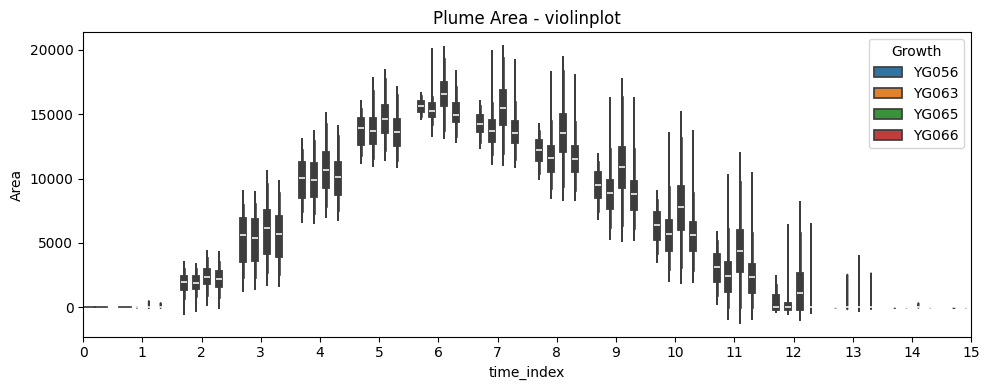

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

df_sample = [df_plume_all[df_plume_all['Growth']=='YG056'], df_plume_all[df_plume_all['Growth']=='YG063'], df_plume_all[df_plume_all['Growth']=='YG065'], df_plume_all[df_plume_all['Growth']=='YG066']]
df_sample = pd.concat(df_sample, ignore_index=True)

sns.violinplot(x='time_index', y='Area', hue='Growth', data=df_sample)
# for flier in ax.collections[::2]:
#     flier.set_alpha(0.3)
ax.set_title('Plume Area - violinplot')
ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

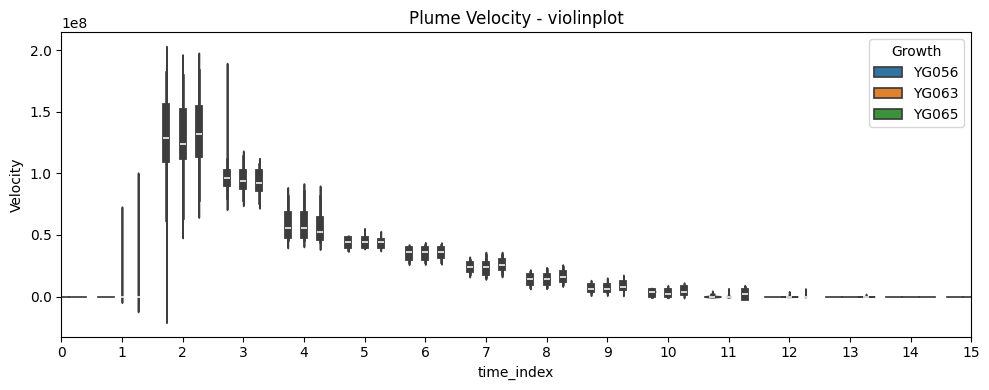

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.violinplot(x='time_index', y='Velocity', hue='Growth', data=df_sample)
# for flier in ax.collections[::2]:
#     flier.set_alpha(0.3)
ax.set_title('Plume Velocity - violinplot')
ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

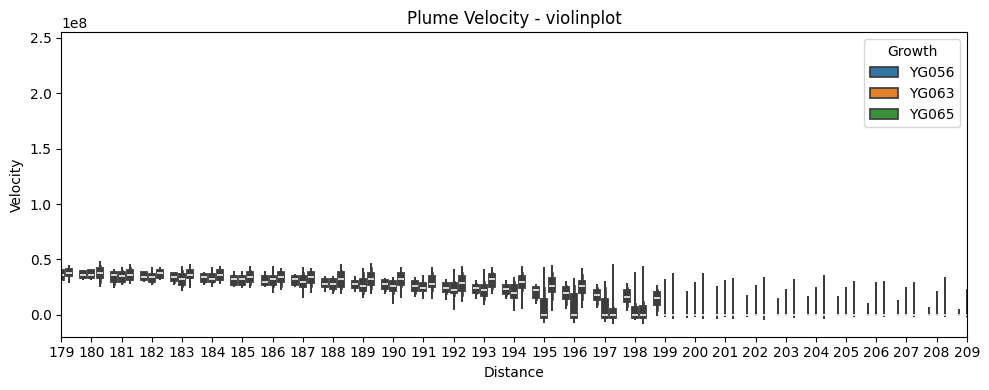

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.violinplot(x='Distance', y='Velocity', hue='Growth', data=df_sample)
ax.set_title('Plume Velocity - violinplot')
ax.set_xlim(150, 180)
plt.tight_layout()
plt.show()

#### lineplot stability

In [46]:
df_plume_all_200 = df_plume_all[df_plume_all['Threshold']=='200']

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1 = df_plume_all_200[df_plume_all_200['Growth']=='YG056']
df1 = df1[df1['plume_index']<=15 & df1['plume_index']>=300]

lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df1, ax=ax)
ax.set_xlim(0, 15)

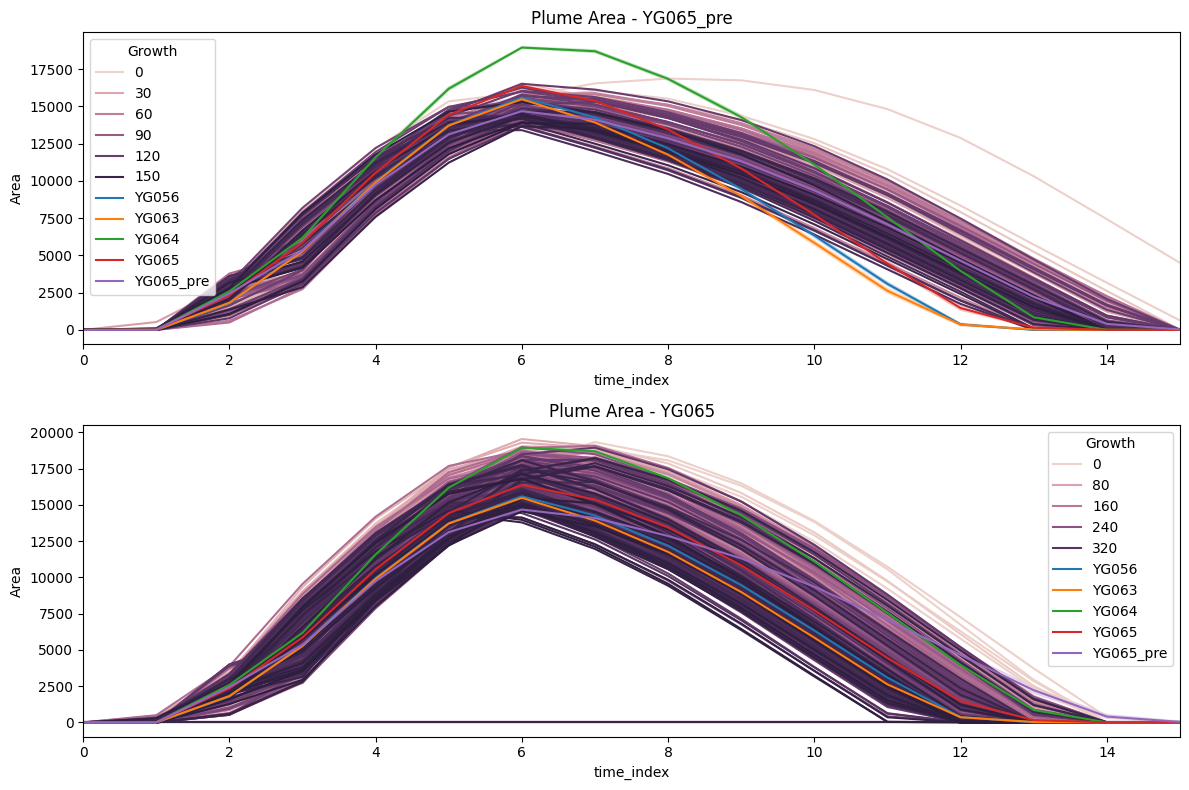

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG065_pre'], ax=axes[0])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[0])
axes[0].set_title('Plume Area - YG065_pre')
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG065'], ax=axes[1])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[1])
axes[1].set_title('Plume Area - YG065')
axes[1].set_xlim(0, 15)

plt.tight_layout()
plt.show()

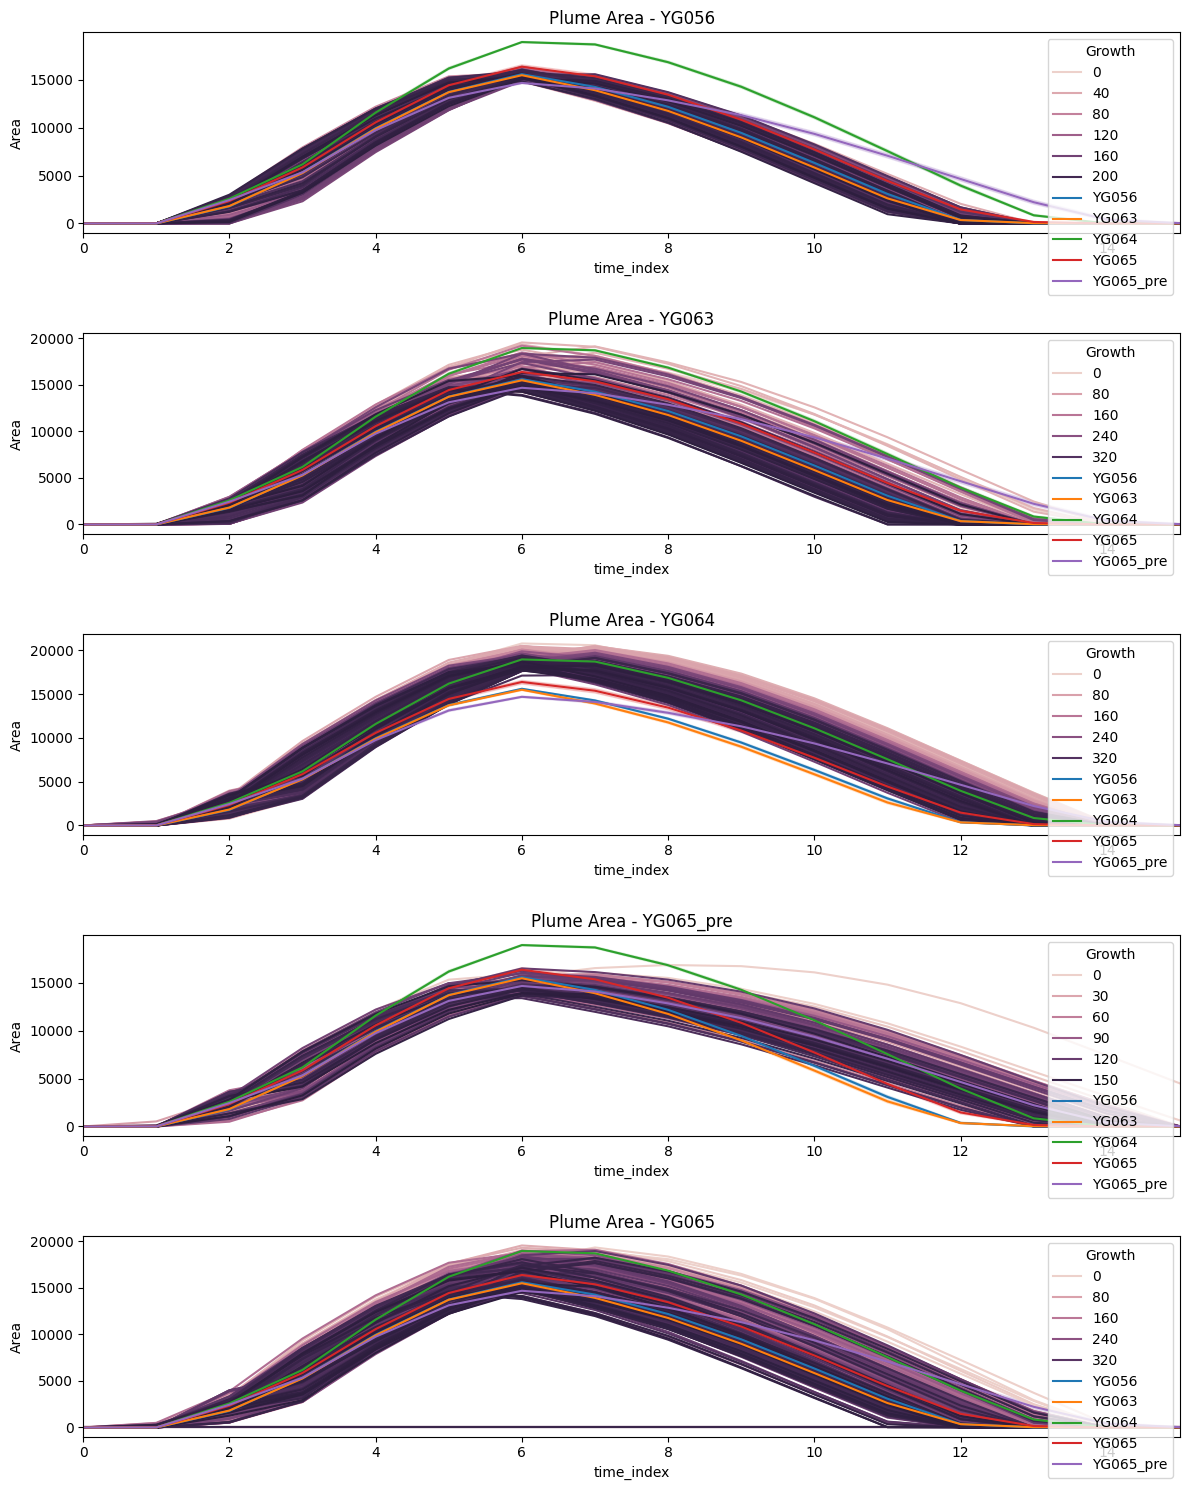

In [48]:
fig, axes = plt.subplots(5, 1, figsize=(12, 15))

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG056'], ax=axes[0])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[0])
axes[0].set_title('Plume Area - YG056')
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG063'], ax=axes[1])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[1])
axes[1].set_title('Plume Area - YG063')
axes[1].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG064'], ax=axes[2])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[2])
axes[2].set_title('Plume Area - YG064')
axes[2].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG065_pre'], ax=axes[3])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[3])
axes[3].set_title('Plume Area - YG065_pre')
axes[3].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG065'], ax=axes[4])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[4])
axes[4].set_title('Plume Area - YG065')
axes[4].set_xlim(0, 15)

plt.tight_layout()
plt.show()

#### heatmap

/var/folders/vw/f9yhqktd2dn424wq_qcx58vsgjs7t2/T/ipykernel_62396/26449780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plume_all_YG065['plume_index'] = df_plume_all_YG065['plume_index'] + df_plume_all_YG065_pre['plume_index'].max()+1


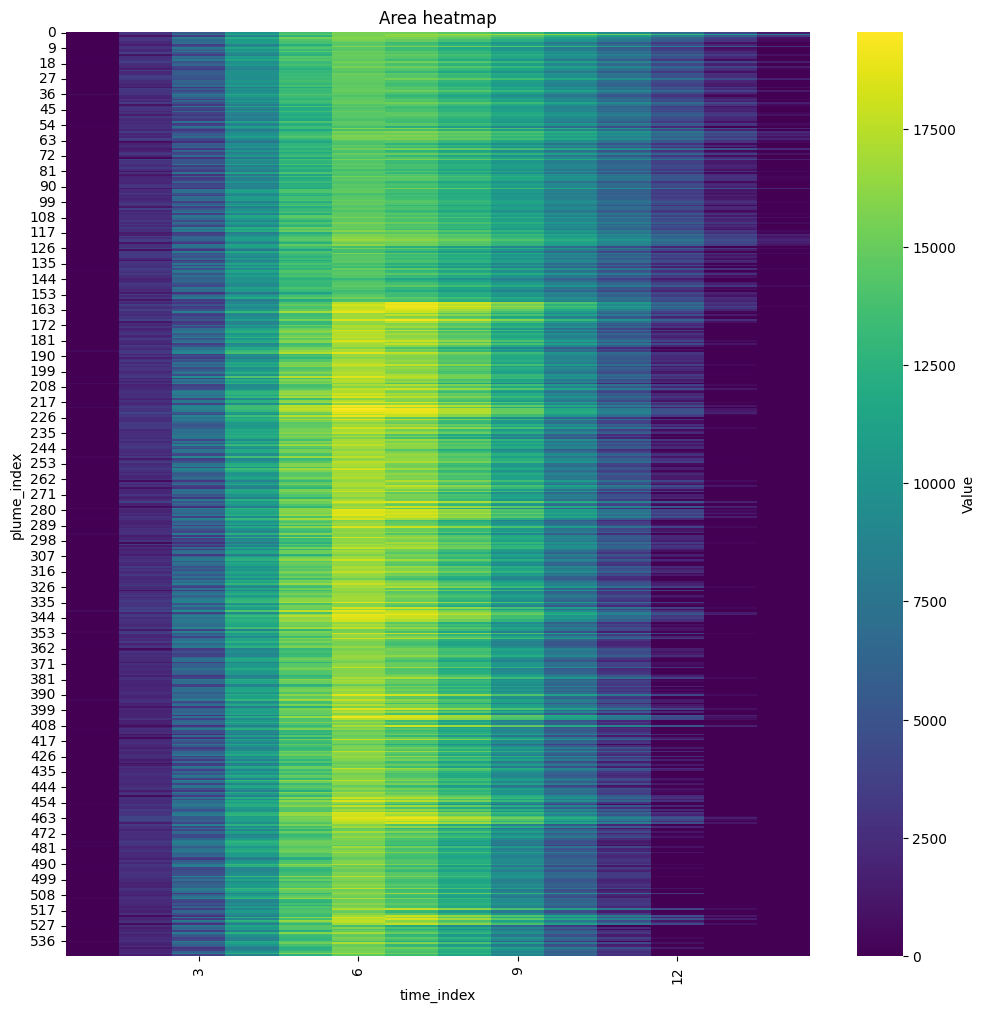

In [48]:
df_plume_all_YG065_pre = df_plume_all[df_plume_all['Growth']=='YG065_pre']
df_plume_all_YG065 = df_plume_all[df_plume_all['Growth']=='YG065']
df_plume_all_YG065['plume_index'] = df_plume_all_YG065['plume_index'] + df_plume_all_YG065_pre['plume_index'].max()+1
df_plume_all_YG065_all = pd.concat([df_plume_all_YG065_pre, df_plume_all_YG065], ignore_index=True)
# df_plume_all_YG065_all = df_plume_all_YG065_all[df_plume_all_YG065_all['plume_index']<=160]
# df_plume_all_YG065_all = df_plume_all_YG065_all[df_plume_all_YG065_all['plume_index']>=150]

df_pivot = df_plume_all_YG065_all.pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

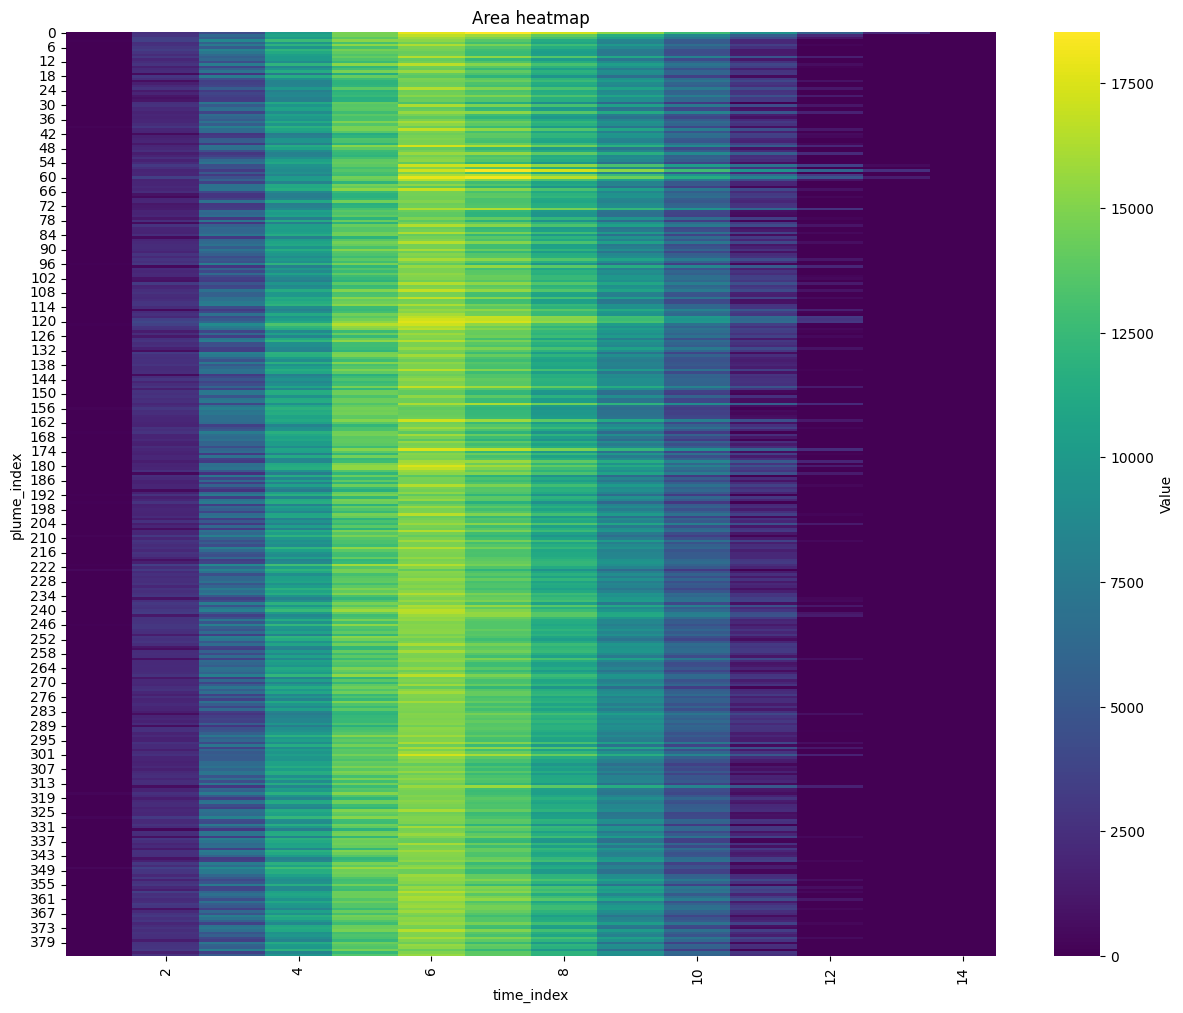

In [10]:
df_pivot = df_plume_all[df_plume_all['Growth']=='YG066'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(15, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

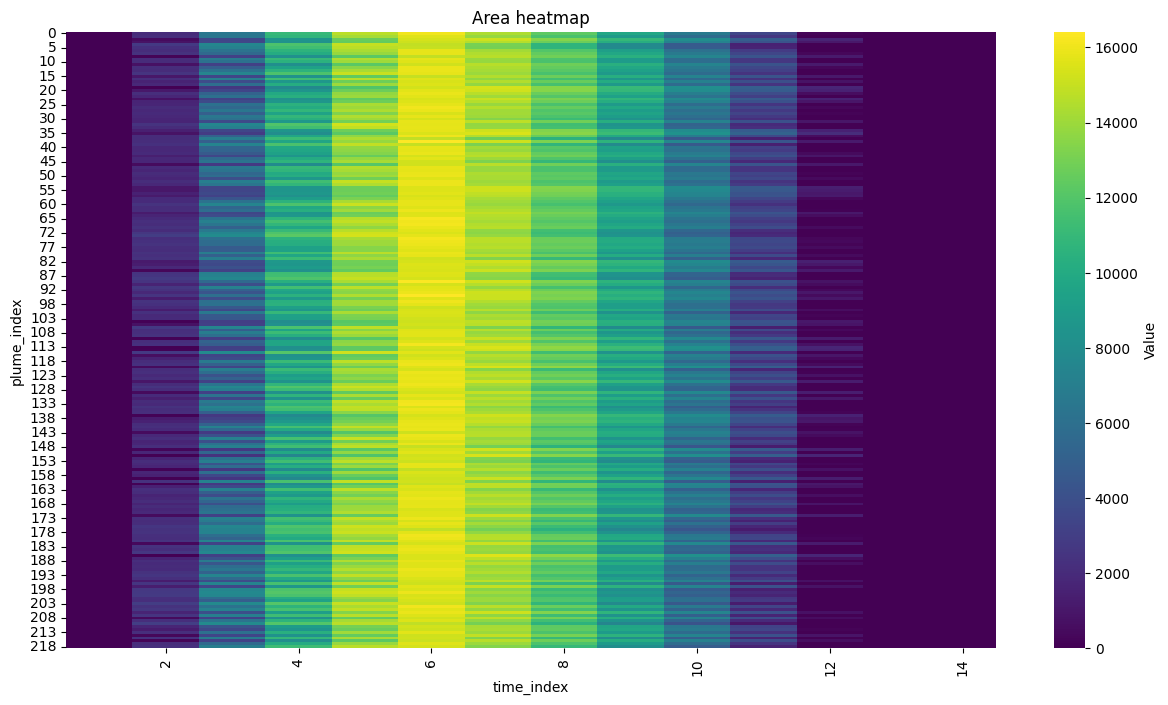

In [50]:
df_pivot = df_plume_all[df_plume_all['Growth']=='YG056'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

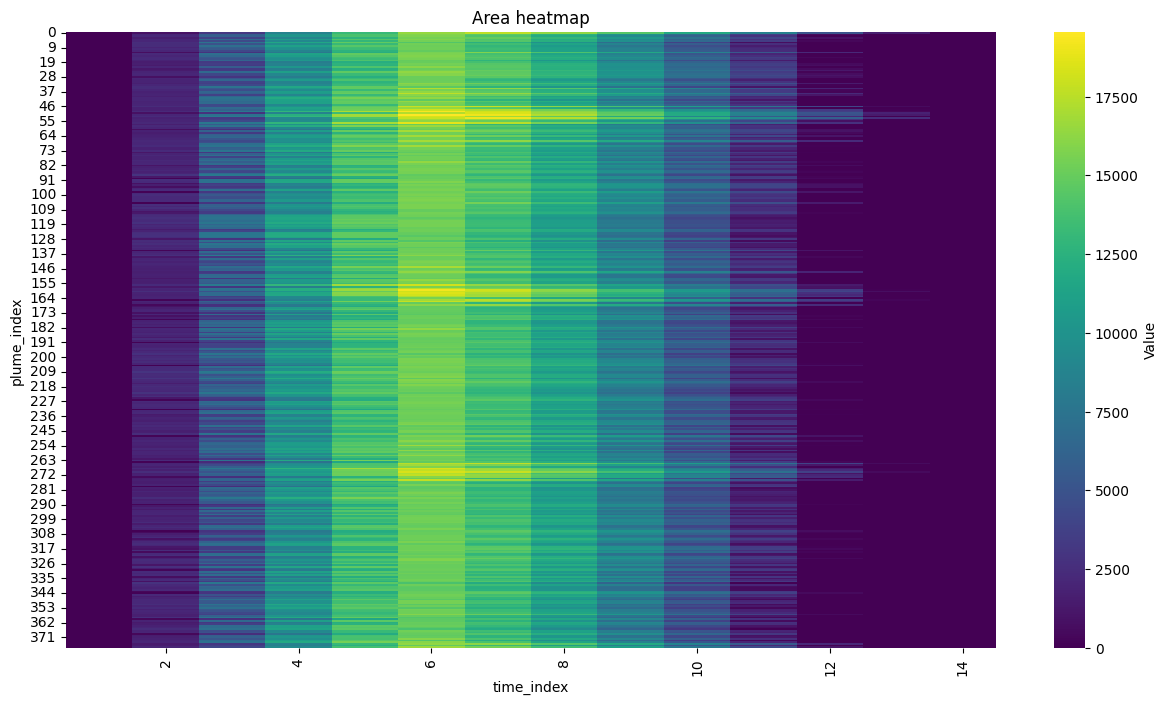

In [54]:
df_pivot = df_plume_all[df_plume_all['Growth']=='YG063'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

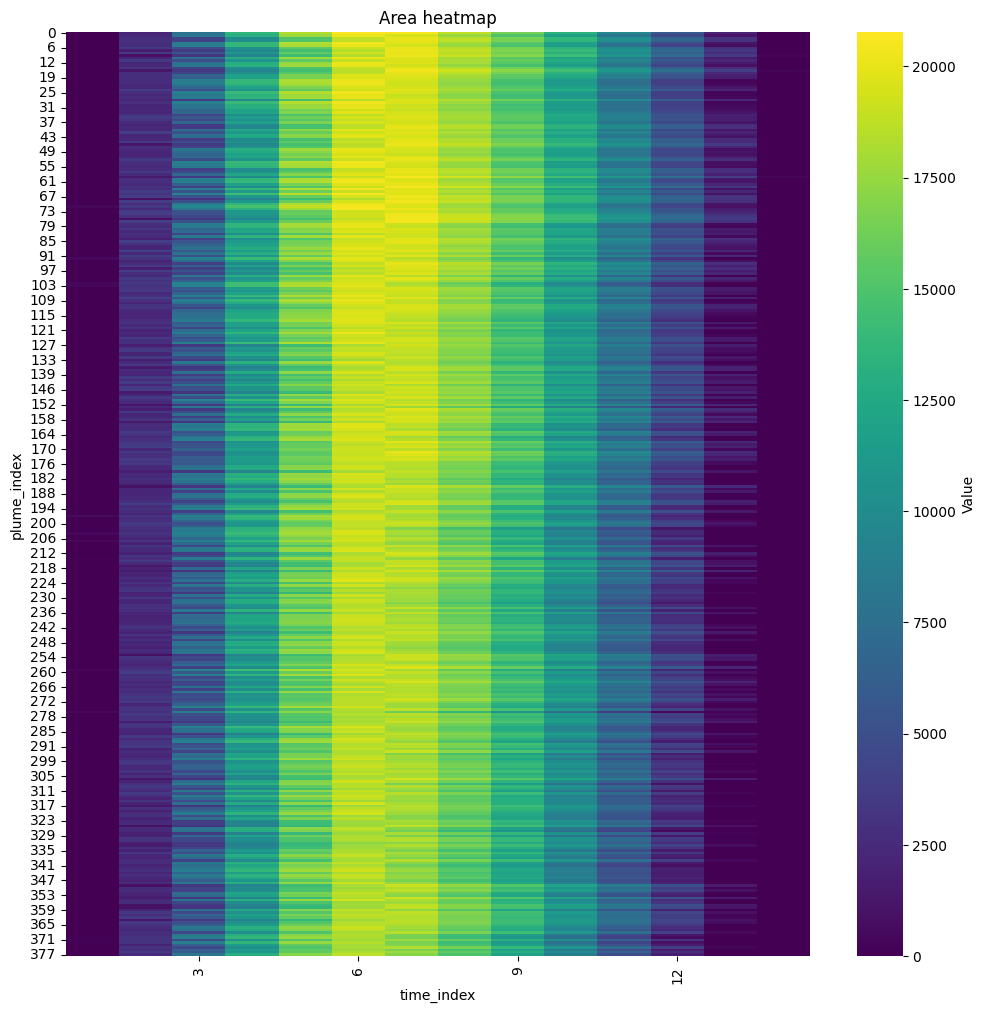

In [22]:
df_pivot = df_plume_all[df_plume_all['Growth']=='YG064'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

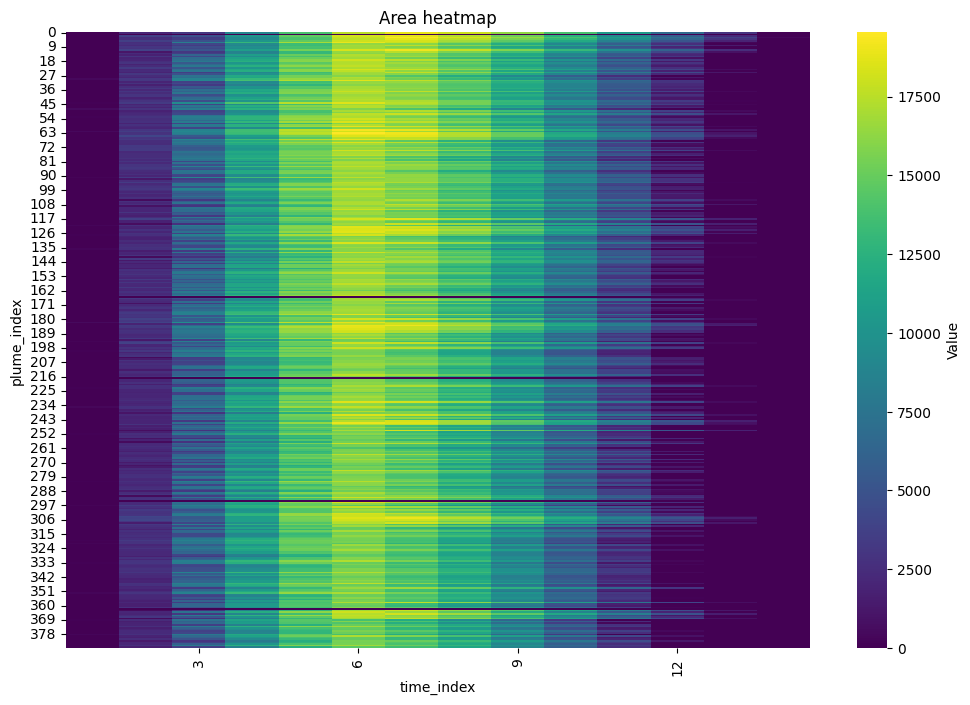

In [23]:
df_pivot = df_plume_all[df_plume_all['Growth']=='YG065'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

/var/folders/vw/f9yhqktd2dn424wq_qcx58vsgjs7t2/T/ipykernel_62396/1176913830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plume_all_YG065['plume_index'] = df_plume_all_YG065['plume_index'] + df_plume_all_YG064['plume_index'].max()+1


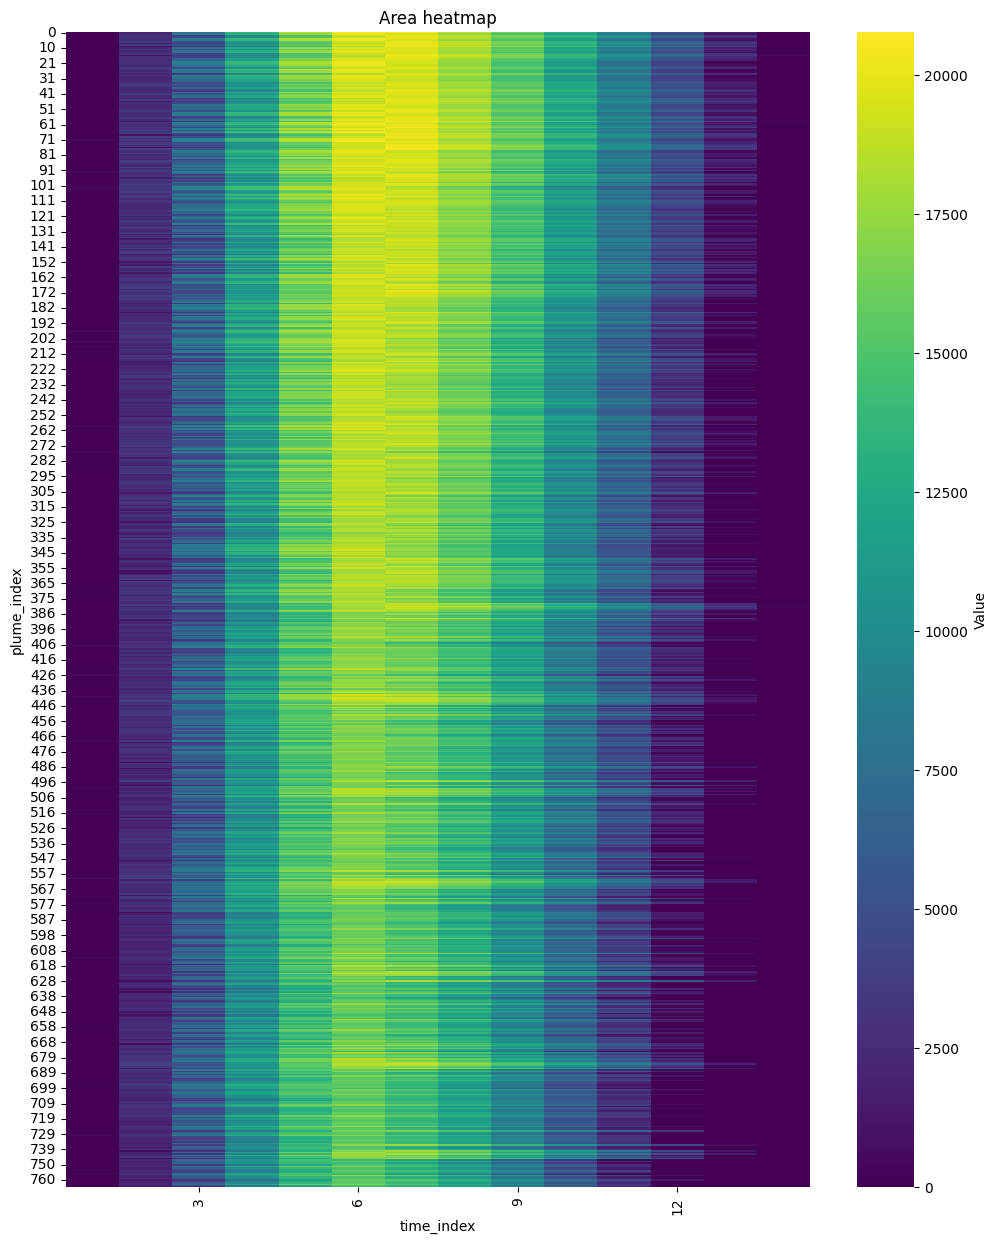

In [55]:
df_plume_all_YG064 = df_plume_all[df_plume_all['Growth']=='YG064']
df_plume_all_YG065 = df_plume_all[df_plume_all['Growth']=='YG065']
df_plume_all_YG065['plume_index'] = df_plume_all_YG065['plume_index'] + df_plume_all_YG064['plume_index'].max()+1
df_plume_all_YG064_065 = pd.concat([df_plume_all_YG064, df_plume_all_YG065])

df_pivot = df_plume_all_YG064_065.pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 15))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

In [ ]:
# Use a heatmap to visualize value trends across plumes and frames
plt.figure(figsize=(10, 6))
sns.heatmap(df_plume_all, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("Frame")
plt.ylabel("Plume")
plt.title("Plume vs Frame Heatmap")

plt.show()